In [1]:
import cv2

In [12]:
img1 = cv2.imread('Color Photo Pixelled.jpg')
img2 = cv2.imread('Group_Pixelled.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

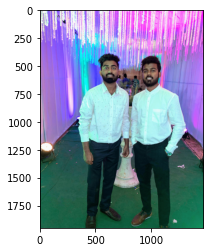

In [16]:
plt.imshow(img1)

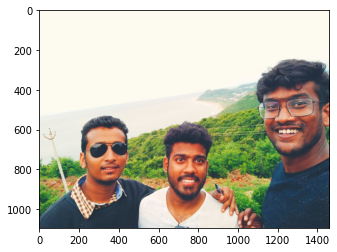

In [17]:
plt.imshow(img2)

## RESHAPING IMAGES

In [18]:
print(img1.shape)
print(img2.shape)

(1950, 1462, 3)
(1095, 1461, 3)


In [19]:
## Blending Images of Same Size

img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))
print(img1.shape)
print(img2.shape)                  

(1200, 1200, 3)
(1200, 1200, 3)


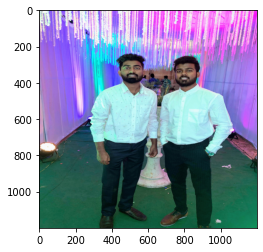

In [20]:
plt.imshow(img1)

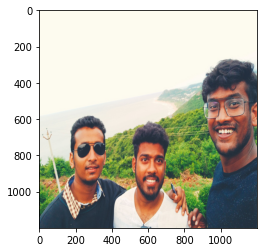

In [21]:
plt.imshow(img2)

(1200, 1200, 3)


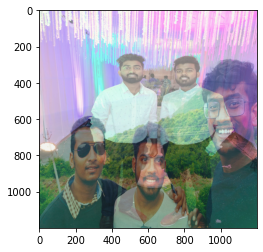

In [29]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)
print(blended.shape)
plt.imshow(blended)

(1200, 1200, 3)


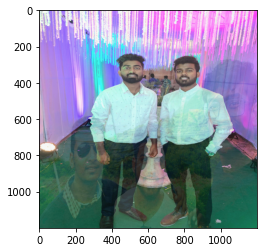

In [30]:
blended1 = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.2, gamma=0)
print(blended1.shape)
plt.imshow(blended1)

## Overlay Small Image on top of Larger Image

### Numpy Reassignmnet

In [31]:
#Note: Addweighted works only on images of samesize

In [43]:
img2 = cv2.imread('Color Photo Pixelled.jpg')
img1 = cv2.imread('Group_Pixelled.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

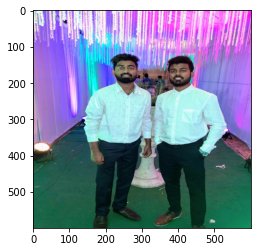

In [44]:
img2 = cv2.resize(img2, (600, 600))
plt.imshow(img2)

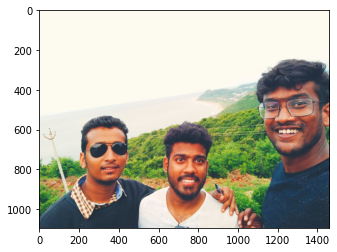

In [45]:
plt.imshow(img1)

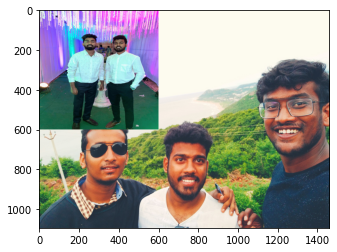

In [47]:
large_img = img1
small_img = img2

x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[1]

large_img[y_offset:y_end, x_offset:x_end] =  small_img
plt.imshow(large_img)

## Blend Images of different sizes

In [48]:
img2 = cv2.imread('Color Photo Pixelled.jpg')
img1 = cv2.imread('Group_Pixelled.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

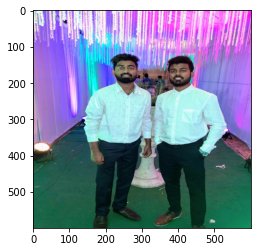

In [49]:
img2 = cv2.resize(img2, (600, 600))
plt.imshow(img2)

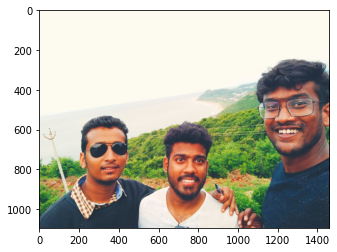

In [50]:
plt.imshow(img1)

In [51]:
print(img1.shape)
print(img2.shape)

(1095, 1461, 3)
(600, 600, 3)


In [60]:
x_offset = 1461 - 600
y_offset = 1095 - 600

In [61]:
rows, cols, channels = img2.shape
print(rows, cols, channels)

600 600 3


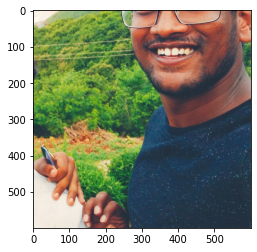

In [62]:
roi = img1[y_offset:1095, x_offset:1461]
plt.imshow(roi)

## Creating Mask

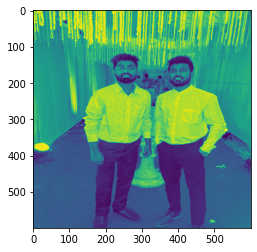

In [63]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray)

(600, 600)


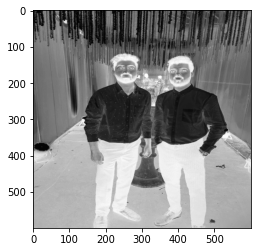

In [74]:
mask_inv = cv2.bitwise_not(img2gray)
print(mask_inv.shape)
plt.imshow(mask_inv, cmap='gray')

In [75]:
import numpy as np

white_background = np.full(img2.shape, 255, dtype=np.uint8)
white_background.shape

(600, 600, 3)

In [76]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

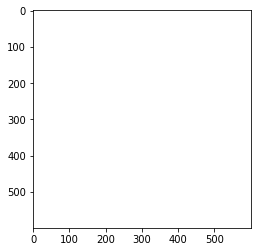

In [77]:
plt.imshow(white_background)

(600, 600, 3)


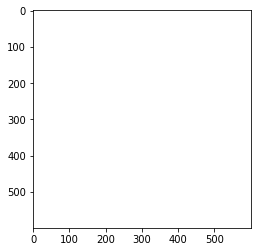

In [78]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
print(bk.shape)
plt.imshow(bk)

(600, 600, 3)


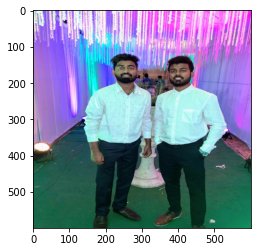

In [79]:
fg = cv2.bitwise_or(img2, img2, mask= mask_inv)
print(fg.shape)
plt.imshow(fg)

(600, 600, 3)


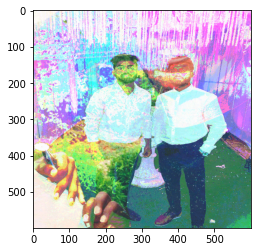

In [82]:
final_roi = cv2.bitwise_or(roi, fg)
print(final_roi.shape)
plt.imshow(final_roi)

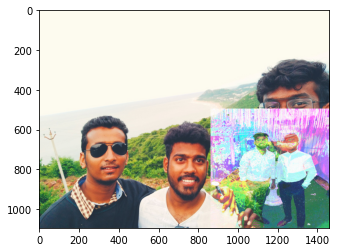

In [83]:
large_img = img1
small_img = final_roi

large_img[y_offset: y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] =  small_img
plt.imshow(large_img)